- Modeling Approaches:
  - Listens.
  - Roc Curve
  - Interpretation.
  - Problems.
  - Table Showing all the tradeoffs
- Proposal model

### start

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import make_pipeline
from credit_fraud_utils_eval import *
from credit_fraud_utils_data import scale_data , balance_data_transformation
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt
import yaml
import joblib
import os
%matplotlib inline

In [2]:
def load_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

config_path = 'config/config.yml'
config = load_config(config_path)
Random_seed = config['random_seed']

In [3]:
train_data_path = config['dataset']['train']['path']
val_data_path = config['dataset']['val']['path']

df_train = pd.read_csv(train_data_path)
df_val = pd.read_csv(val_data_path)

train_feature = config['dataset']['train_feature']
traget_feature = config['dataset']['target']

X_train = df_train[train_feature]
y_train = df_train[traget_feature]

X_val = df_val[train_feature]
y_val = df_val[traget_feature]

In [4]:
report_val = {}
model_comparison = {}

In [5]:
y_train.value_counts()

Class
0    170579
1       305
Name: count, dtype: int64

In [ ]:
# balance_type = "over" # smote over 

# ratio_minority= 0.05  

# sampling_strategy = ratio_minority

# X_train , y_train = balance_data_transformation(X_train, y_train, balance_type=balance_type, sampling_strategy=sampling_strategy, k=5,  random_state=Random_seed)

# X_train_scaled , X_val_scaled = scale_data(X_train, X_val)

In [6]:
y_train.value_counts()

Class
0    170579
1       305
Name: count, dtype: int64

### Random Forest

<!-- rf = RandomForestClassifier(
    n_estimators=600,   
    min_samples_leaf = 2, 
    min_samples_split = 4,
    class_weight={0: 0.25 , 1: 1},   
    n_jobs=-1,              
    random_state=Random_seed  
)
rf.fit(X_train, y_train) -->

In [ ]:
# rf = RandomForestClassifier(
#     n_estimators=600,
#     min_samples_leaf=15,
#     min_samples_split=30,
#     bootstrap=True, 
#     class_weight= {0: 0.15, 1: 0.85}, 
#     n_jobs=-1,              
#     random_state=Random_seed  
# ) # 0.85 valdation



# best_params = {'n_estimators': 200,
#  'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'class_weight': {0: 0.2, 1: 0.8}}


In [ ]:

# param_distributions = {
#     'n_estimators': [200, 400, 600 ,800],
#     'min_samples_leaf': [2, 5, 10, 15],
#     'min_samples_split': [5, 10, 20],
#     'class_weight': [{0: 0.20, 1: 0.80}, 'balanced_subsample', {0: 0.15, 1: 0.85}],
# }

# # Define the StratifiedKFold cross-validator
# stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=Random_seed)

# # Set up the GridSearchCV with f1 score for the positive class
# scorer = make_scorer(f1_score, pos_label=1)

# random_search = RandomizedSearchCV(
#     estimator=RandomForestClassifier(n_jobs=-1, bootstrap=True, random_state=Random_seed),
#     param_distributions=param_distributions,
#     scoring=scorer,
#     cv=stratified_kfold,
#     n_iter=20,  
#     n_jobs=-1,
#     verbose=2,
#     random_state=Random_seed 
# )

# random_search.fit(X_train, y_train)


# print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score (f1 score for positive class): ", random_search.best_score_)

# # Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'class_weight': {0: 0.2, 1: 0.8}}

# # Evaluate the best model on the test data
# rf = random_search.best_estimator_
# y_pred = rf.predict(X_val)

# # Print the classification report and F1 score for the positive class
# print("Classification report:\n", classification_report(y_val, y_pred))
# print("F1 Score (positive class): ", f1_score(y_val, y_pred, pos_label=1))


In [56]:
best_params =  {'n_estimators': 200,
                'min_samples_split': 5,
                'min_samples_leaf': 2,
                'class_weight': {0: 0.2, 1: 0.8}
                }

rf = RandomForestClassifier(
    n_estimators=800,
    min_samples_leaf=5,
    min_samples_split=2,
    class_weight= {0: 0.2, 1: 0.8},
    bootstrap=True, 
    random_state=Random_seed,
    n_jobs=-1,    
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=5,
                       n_estimators=800, n_jobs=-1, random_state=16)

Random Forest Train Classification Report
              precision    recall  f1-score   support

           0    0.99970   0.99989   0.99979    170579
           1    0.93040   0.83279   0.87889       305

    accuracy                        0.99959    170884
   macro avg    0.96505   0.91634   0.93934    170884
weighted avg    0.99958   0.99959   0.99958    170884



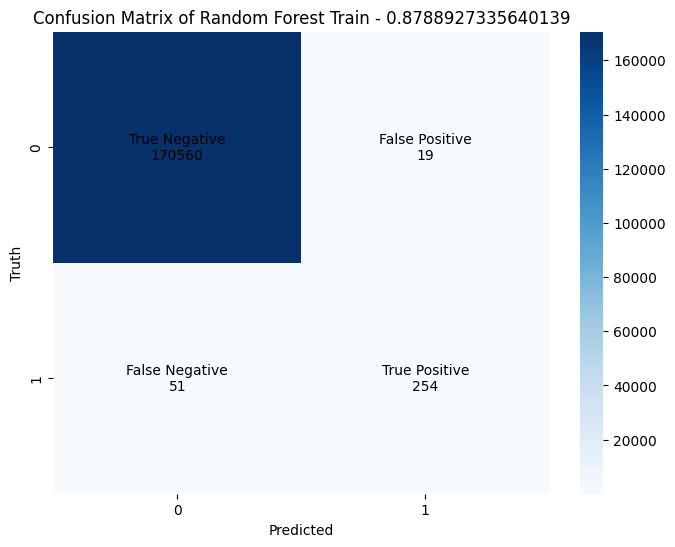

In [57]:
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

_ = eval_classification_report_confusion_matrix(y_pred=y_train_pred, y_true=y_train, title='Random Forest Train')

* False Positive ().
* False Negative (Number of fraud transctions we can't catch).

Random Forest Val Classification Report
              precision    recall  f1-score   support

           0    0.99968   0.99988   0.99978     56870
           1    0.91139   0.80000   0.85207        90

    accuracy                        0.99956     56960
   macro avg    0.95554   0.89994   0.92593     56960
weighted avg    0.99954   0.99956   0.99955     56960



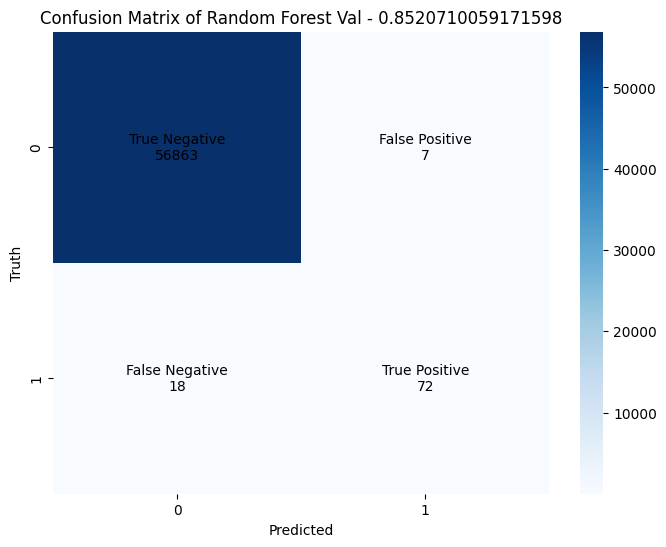

In [58]:
y_val_pred = rf.predict(X_val)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='Random Forest Val')
# model_comparison = eval_update_model_stats(model_comparison, 'Random Forest',  report_val) 0.852

Optimal Threshold: 0.3088539351013487 F1 Score: 0.9290123456790124
Random Forest Val with optimal threshold Classification Report
              precision    recall  f1-score   support

           0    0.99977   0.99974   0.99975     56870
           1    0.83696   0.85556   0.84615        90

    accuracy                        0.99951     56960
   macro avg    0.91836   0.92765   0.92295     56960
weighted avg    0.99951   0.99951   0.99951     56960



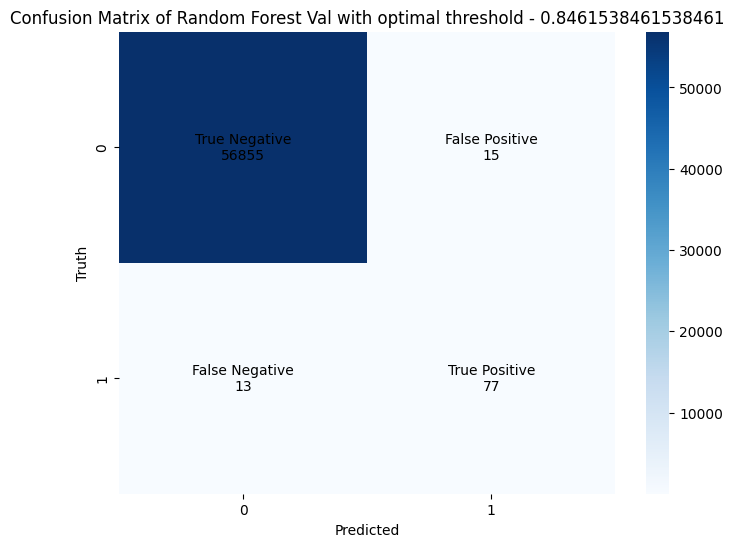

In [59]:
from credit_fraud_utils_eval import eval_best_threshold , eval_predict_with_threshold


y_train_pred_proba = rf.predict_proba(X_train)[:,1]
optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_train_pred_proba,y_true=y_train)

y_val_pred = eval_predict_with_threshold(model=rf, x=X_val, threshold=optimal_threshold)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='Random Forest Val with optimal threshold')

# model_comparison = eval_update_model_stats(model_comparison, 'Random Forest optimal threshold',  report_val)


* we have two goal minmize f-socer of postive class and False Negative.
* Random Forest with optimle threshold is butter.
    * becase its Minimizing false negative

In [ ]:
importances = rf.feature_importances_
feature_names = X_val.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### AdaBoost

In [ ]:
adboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), # use a stump tree as weak learner
                   n_estimators=500,
                   learning_rate=0.01,
                   algorithm='SAMME',
                   random_state=Random_seed)

adboost.fit(X_train, y_train)

In [ ]:
y_train_pred = adboost.predict(X_train)

_ = eval_classification_report_confusion_matrix(y_pred=y_train_pred,y_true=y_train , title='AdaBoost Train')

In [ ]:
y_val_pred = adboost.predict(X_val)

report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='AdaBoost Val')
model_comparison = eval_update_model_stats(model_comparison, 'AdaBoost',  report_val)


In [ ]:
y_train_pred_proba = adboost.predict_proba(X_train)[:,1]
optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_train_pred_proba,y_true=y_train)

y_val_pred = eval_predict_with_threshold(model=rf, x=X_val, threshold=optimal_threshold)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='AdaBoost Validation with optimal threshold')
model_comparison = eval_update_model_stats(model_comparison, 'AdaBoost optimal threshold',  report_val)


### Extra Tree

In [ ]:
extra_trees = ExtraTreesClassifier(
                    n_estimators=500, 
                    max_leaf_nodes=10,
                    n_jobs=-1, 
                    random_state=42
                    )


extra_trees.fit(X_train, y_train)

In [ ]:
y_train_pred = extra_trees.predict(X_train)
_ = eval_classification_report_confusion_matrix(y_pred=y_train_pred,y_true=y_train, title='Extra Trees Train')

In [ ]:
print('Validation Classification Report')
y_val_pred = extra_trees.predict(X_val)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='Extra Trees Val')
model_comparison = eval_update_model_stats(model_comparison, 'Extra Trees', report_val)

In [ ]:
y_train_pred_proba = extra_trees.predict_proba(X_train)[:,1]

optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_train_pred_proba,y_true=y_train)

y_val_pred = eval_predict_with_threshold(model=extra_trees, x=X_val, threshold=optimal_threshold)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='Extra Trees Val with optimal threshold')
model_comparison = eval_update_model_stats(model_comparison, 'Extra Trees optimal threshold',  report_val)

### Xgboost

In [ ]:
xgboost = GradientBoostingClassifier(
    n_estimators=600,
    learning_rate=0.01,
    max_depth=3,
    n_iter_no_change=10,
    random_state=Random_seed
)

xgboost.fit(X_train, y_train)

In [ ]:
y_train_pred = xgboost.predict(X_train)
_ = eval_classification_report_confusion_matrix(y_pred=y_train_pred, y_true=y_train, title='XGBoost Train')

In [ ]:
y_val_pred = xgboost.predict(X_val)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred, y_true=y_val, title='XGBoost Val')
model_comparison = eval_update_model_stats(model_comparison, 'XGBoost', report_val)

In [ ]:
y_train_pred_proba = xgboost.predict_proba(X_train)[:,1]

optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_train_pred_proba,y_true=y_train)

y_val_pred = eval_predict_with_threshold(model=xgboost, x=X_val, threshold=optimal_threshold)
report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='XGBoost Val with optimal threshold')
model_comparison = eval_update_model_stats(model_comparison, 'XGBoost optimal threshold',  report_val)

In [ ]:
# Comparison Ensemble models
model_comparison = pd.DataFrame(model_comparison)
model_comparison.T

* Adabost and Random Forest outperform another models.
* Model with optimal threshold outperform models with Default theshold. 

### Logistic Regression


In [11]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [12]:
class_count= {0:len(y_train[y_train == 0]),
              1:len(y_train[y_train == 1])}

total_samples = sum(class_count.values())
balanced_cweights = {cls: total_samples / (len(class_count) * count) for cls, count in class_count.items()}

balanced_cweights

{0: 0.5008940139173051, 1: 280.1377049180328}

d:\Repo\New folder\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Train Classification Report
              precision    recall  f1-score   support

           0    0.99960   0.99985   0.99972    170579
           1    0.90076   0.77377   0.83245       305

    accuracy                        0.99944    170884
   macro avg    0.95018   0.88681   0.91609    170884
weighted avg    0.99942   0.99944   0.99942    170884



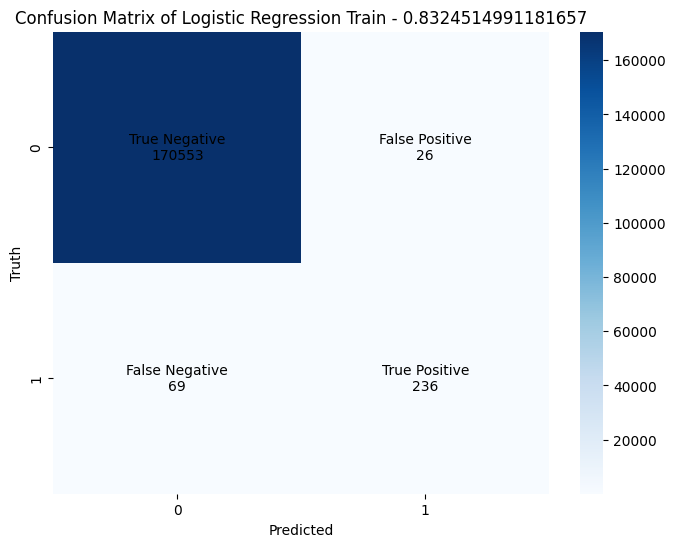

In [13]:
# take round 255 min
# param_grid = {
#     'C':            [0.1, 1.0, 10.0],
#     'penalty':      ['l2'],
#     'class_weight': ['balanced', None, {0: 0.35, 1: 0.65}, {0: 0.25, 1: 0.75}, {0: 0.15, 1: 0.85}],
#     'solver':       ['sag', 'lbfgs', 'saga', ' newton-cg'],  
#     'max_iter':     [400, 500, 600, 800],
# }
  
# lr = LogisticRegression()

# scorer = make_scorer(f1_score, pos_label=1)

# stratified_kfold = StratifiedKFold(n_splits=5, 
#                                    shuffle=True,
#                                    random_state=42)

# grid_search = GridSearchCV(lr, 
#                            param_grid,cv=stratified_kfold, 
#                            scoring=scorer, 
#                            n_jobs=-1)

# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)
# best_lr = grid_search.best_estimator_


# Best Hyperparameters: {'C': 0.1, 'class_weight': {0: 1, 1: 2}, 'max_iter': 600, 'penalty': 'l2', 'solver': 'sag'}
# Best Hyperparameters: {'C': 0.1, 'class_weight': {0: 0.25, 1: 0.75}, 'max_iter': 800, 'penalty': 'l2', 'solver': 'sag'} 0.81
# newton-cg, lbfgs, sag, saga
best_params = {'C': 0.1, 'class_weight': {0: 0.25, 1: 0.75}, 'max_iter': 800, 'penalty': 'l2', 'solver': 'sag'}
lr = LogisticRegression(
    **best_params,
    random_state=Random_seed,
    n_jobs=-1
)

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_train_scaled)

_ = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_train, title='Logistic Regression Train')

Logistic Regression Val Classification Report
              precision    recall  f1-score   support

           0    0.99960   0.99986   0.99973     56870
           1    0.89333   0.74444   0.81212        90

    accuracy                        0.99946     56960
   macro avg    0.94646   0.87215   0.90592     56960
weighted avg    0.99943   0.99946   0.99943     56960



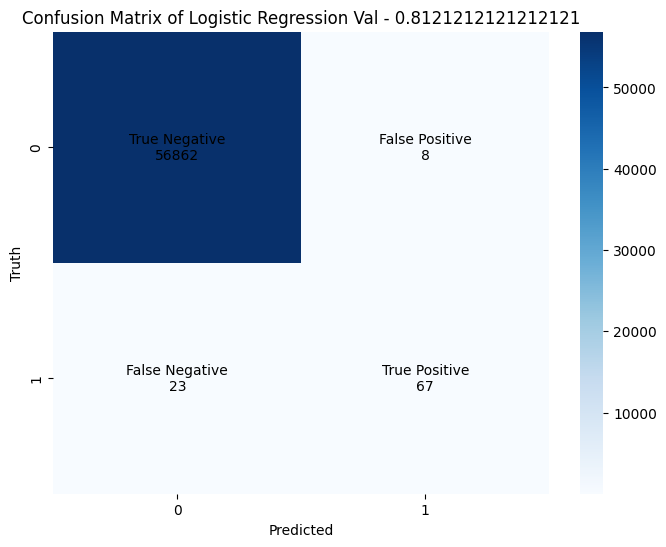

In [14]:
y_pred = lr.predict(X_val_scaled)

report_val = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_val, title='Logistic Regression Val')
# model_comparison = eval_update_model_stats(model_comparison, 'Logistic Regression', report_val)

Optimal Threshold: 0.5144944063678842 F1 Score: 0.8339222614840989
Logistic Regression Val with optimal threshold Classification Report
              precision    recall  f1-score   support

           0    0.99960   0.99988   0.99974     56870
           1    0.90541   0.74444   0.81707        90

    accuracy                        0.99947     56960
   macro avg    0.95250   0.87216   0.90840     56960
weighted avg    0.99945   0.99947   0.99945     56960



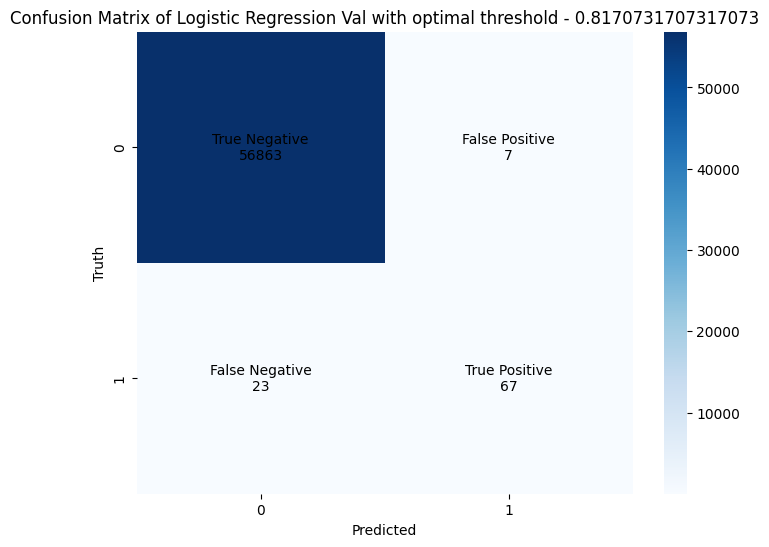

In [15]:
y_pred_proba = lr.predict_proba(X_train_scaled)[:,1]

optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_pred_proba,y_true=y_train)

y_val_pred = eval_predict_with_threshold(model=lr, x=X_val_scaled, threshold=optimal_threshold)

report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='Logistic Regression Val with optimal threshold')
# model_comparison = eval_update_model_stats(model_comparison, 'Logistic Regression optimal threshold',  report_val)

### Neural Network


#### Sklearn implementation 

Number of parameters in each layer: [3840, 8192, 64]
Total number of parameters: 12096
MLP Train Classification Report
              precision    recall  f1-score   support

           0    0.99968   0.99998   0.99983    170579
           1    0.98819   0.82295   0.89803       305

    accuracy                        0.99967    170884
   macro avg    0.99394   0.91147   0.94893    170884
weighted avg    0.99966   0.99967   0.99965    170884



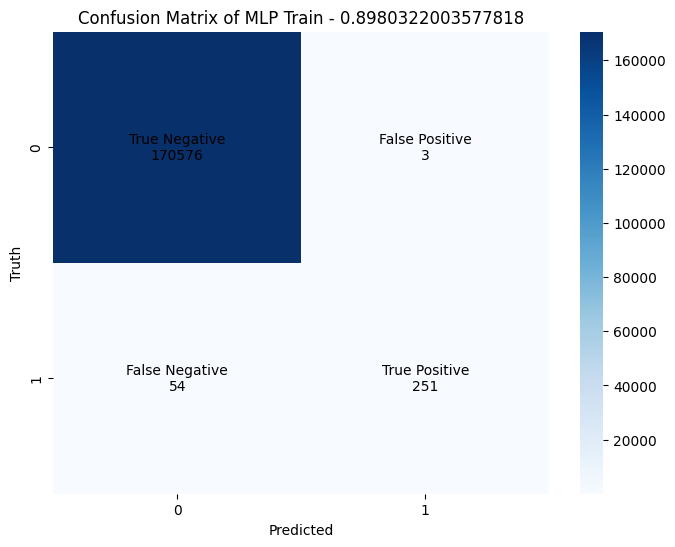

MLP Val Classification Report
              precision    recall  f1-score   support

           0    0.99961   0.99995   0.99978     56870
           1    0.95775   0.75556   0.84472        90

    accuracy                        0.99956     56960
   macro avg    0.97868   0.87775   0.92225     56960
weighted avg    0.99955   0.99956   0.99954     56960



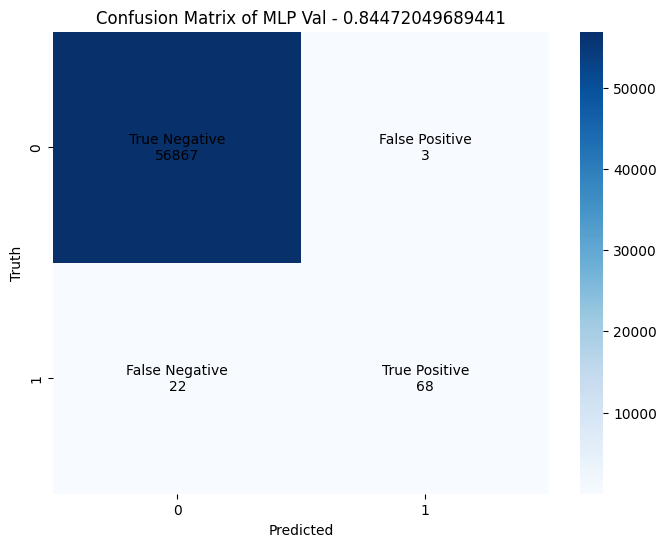

In [16]:
# Step 1: Data Preprocessing
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Define Hyperparameter Distributions
# param_dist = {
#     'activation': ['relu'],
#     'hidden_layer_sizes': [
#         (30, 20), 
#         (30, 20, 10), 
#         (40, 30, 20), 
#         (64, 32, 16),
#         (64, 32, 32, 16)
#     ],
#     'solver': ['adam', 'sgd'],
#     'batch_size': [64, 128, 512],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'alpha': [0.001, 0.01, 0.025],
#     'max_iter': [500, 800, 1000, 2000],
#     'random_state': [Random_seed]
# }

# # Step 3: Implement RandomizedSearchCV with StratifiedKFold
# MLP_CV = MLPClassifier()
# scorer = make_scorer(f1_score, pos_label=1)  # Adjust pos_label based on the positive class in your dataset
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=Random_seed)
# random_search = RandomizedSearchCV(MLP_CV, param_distributions=param_dist, n_iter=30, cv=cv, scoring=scorer, n_jobs=-1, random_state=Random_seed)
# random_search.fit(X_train_scaled, y_train)

# # Best Parameters
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

MLP = MLPClassifier(
    solver='sgd',
    random_state=Random_seed,
    max_iter=500,
    learning_rate_init=0.1,
    hidden_layer_sizes=(128, 64),
    batch_size=512,
    alpha=0.01,
    activation='tanh'
)

# Step 4: Evaluate the Model with Best Parameters
# MLP = random_search.best_estimator_
MLP.fit(X_train_scaled, y_train)

parameter_counts = [np.prod(layer.shape) for layer in MLP.coefs_]
print("Number of parameters in each layer:", parameter_counts)
print("Total number of parameters:", sum(parameter_counts))

# Assuming eval_classification_report_confusion_matrix is defined
y_train_pred = MLP.predict(X_train_scaled)
_ = eval_classification_report_confusion_matrix(y_pred=y_train_pred, y_true=y_train, title='MLP Train')

y_train_pred = MLP.predict(X_val_scaled)
report_val = eval_classification_report_confusion_matrix(y_pred=y_train_pred,y_true=y_val, title='MLP Val')
# model_comparison = eval_update_model_stats(model_comparison, 'MLP', report_val)

In [ ]:
# MLP_best_params = {'solver': 'sgd',
#  'random_state': 16,
#  'max_iter': 500,
#  'learning_rate_init': 0.1,
#  'hidden_layer_sizes': (128, 64),
#  'batch_size': 512,
#  'alpha': 0.01,
#  'activation': 'tanh'}

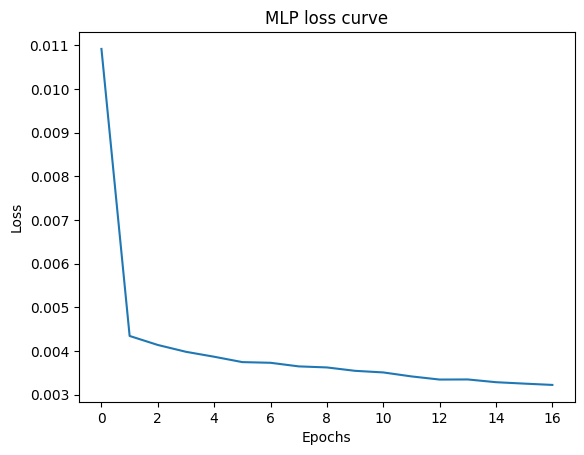

In [17]:
plt.plot(MLP.loss_curve_)
plt.title('MLP loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Optimal Threshold: 0.40108410936736905 F1 Score: 0.9084507042253521
MLP Val with optimal threshold Classification Report
              precision    recall  f1-score   support

           0    0.99965   0.99993   0.99979     56870
           1    0.94595   0.77778   0.85366        90

    accuracy                        0.99958     56960
   macro avg    0.97280   0.88885   0.92672     56960
weighted avg    0.99956   0.99958   0.99956     56960



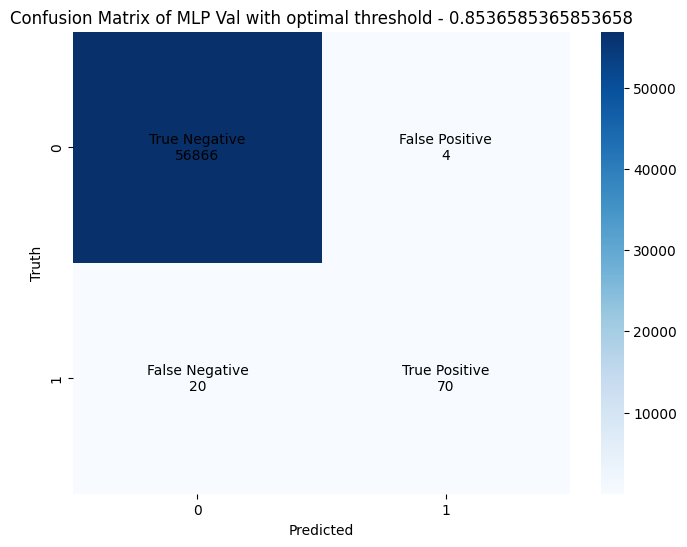

KeyError: 'auc'

In [18]:
y_pred_proba = MLP.predict_proba(X_train_scaled)[:,1]

optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_pred_proba,y_true=y_train)

y_val_pred = eval_predict_with_threshold(model=MLP, x=X_val_scaled, threshold=optimal_threshold)

report_val = eval_classification_report_confusion_matrix(y_pred=y_val_pred,y_true=y_val, title='MLP Val with optimal threshold')
# model_comparison = eval_update_model_stats(model_comparison, 'MLP optimal threshold',  report_val)


In [ ]:
pd.DataFrame(model_comparison).T

#### pytorch implemention

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.utils.class_weight import compute_class_weight

# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)


# class FraudDetectionNN(nn.Module):
#     def __init__(self):
#         super(FraudDetectionNN, self).__init__()
#         self.hidden1 = nn.Linear(X_train.shape[1], 32)
#         self.hidden2 = nn.Linear(32, 15)
#         self.output = nn.Linear(15, 1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.hidden1(x))
#         x = self.relu(self.hidden2(x))
#         x = torch.sigmoid(self.output(x))
#         return x


# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
# criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])


# model = FraudDetectionNN()
# optimizer = optim.Adam(model.parameters(), lr=0.01)


# num_epochs = 5
# batch_size = 32

# for epoch in range(num_epochs):
#     model.train()
#     permutation = torch.randperm(X_train_tensor.size()[0])

#     for i in range(0, X_train_tensor.size()[0], batch_size):
#         indices = permutation[i:i + batch_size]
#         batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

#         optimizer.zero_grad()
#         outputs = model(batch_x)
#         loss = criterion(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

#     if (epoch + 1) % 100 == 0:
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


# model.eval()
# with torch.no_grad():
#     y_train_pred = model(X_train_tensor).round().detach().tolist()

# _ = eval_classification_report_confusion_matrix(y_pred=y_train_pred,y_true=y_train)

In [ ]:
# X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
# y_train_pred = model(X_val_tensor).round().detach().tolist()

# report_val = eval_classification_report_confusion_matrix(y_pred=y_train_pred,y_true=y_val, title='NN Val')
# model_comparison = update_model_eval_stats(model_comparison, 'NN', report_val)

In [ ]:
# Comparison Gradient Based Models
model_comparison[['MLP',  'Logistic Regression']].T

## KNN

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [i for i in range(1, 10, 5)] }

scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

X_train = np.array(X_train)
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_train)
_ = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_train)

* KNN overfiting and if we increate the inti value will inderfit

In [ ]:
y_pred = best_knn.predict(X_val)

report_val = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_val, title='KNN Val')
model_comparison = eval_update_model_stats(model_comparison, 'KNN', report_val)

## VotingClassifier


In [1]:
from mlxtend.classifier import EnsembleVoteClassifier 

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

voting_model = EnsembleVoteClassifier(
        clfs=[
            make_pipeline(scaler, lr),
            make_pipeline(scaler, MLP),
            rf,
        ],
        voting='soft',
        weights=[1, 2, 5],
        fit_base_estimators=False,
        use_clones=False
)


y_pred = voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_train)

_ = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_train, title='Voting Train')

NameError: name 'RobustScaler' is not defined

Voting Val Classification Report
              precision    recall  f1-score   support

           0    0.99967   0.99991   0.99979     56870
           1    0.93421   0.78889   0.85542        90

    accuracy                        0.99958     56960
   macro avg    0.96694   0.89440   0.92761     56960
weighted avg    0.99956   0.99958   0.99956     56960



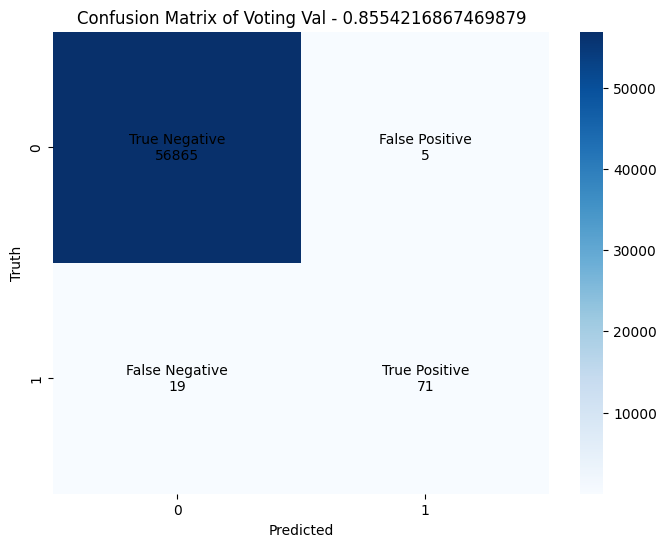

In [73]:
y_pred = voting_model.predict(X_val)

report_val = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_val, title='Voting Val')
# model_comparison = eval_update_model_stats(model_comparison, 'Voting', report_val)

Optimal Threshold: 0.18405942933526379 F1 Score: 0.9131736526946108
Voting Val with optimal threshold Classification Report
              precision    recall  f1-score   support

           0    0.99977   0.99970   0.99974     56870
           1    0.81915   0.85556   0.83696        90

    accuracy                        0.99947     56960
   macro avg    0.90946   0.92763   0.91835     56960
weighted avg    0.99949   0.99947   0.99948     56960



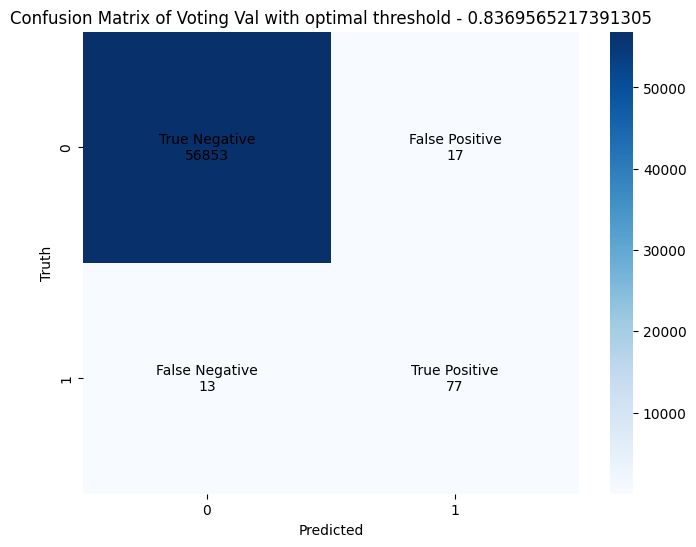

In [74]:
y_pred = voting_model.predict_proba(X_train)[:,1]

optimal_threshold , f1_scores = eval_best_threshold(y_pred=y_pred,y_true=y_train)

y_pred = eval_predict_with_threshold(model=voting_model, x=X_val, threshold=optimal_threshold)

report_val = eval_classification_report_confusion_matrix(y_pred=y_pred,y_true=y_val, title='Voting Val with optimal threshold')
# model_comparison = eval_update_model_stats(model_comparison, 'Voting optimal threshold',  report_val)

In [ ]:
model_comparison = pd.DataFrame(model_comparison)
model_comparison.T

In [ ]:
model_comparison.to_csv('model_comparison(Original DataSet).csv', index=False)